<a href="https://colab.research.google.com/github/ArnavKetkar/Pytorch/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer vision libraries

* `torchvision` - main base library
* `torchvision.datasets` - get datasets and data loading functions
* `torchvision.models` - get pretraained cv models
* `torchvision.transforms` - functions for manipulating vision data
* `torch.utils.data.Dataset` - base dataset class for pytorch
*`torch.utils.data.DataLoader` - creates python iterable over dataset

In [4]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## Getting a dataset
We'll be using FashionMNIST dataset from `torchvision.datasets`

In [5]:
train_data = datasets.FashionMNIST(root='data',
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root='data',
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 13312554.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211564.91it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3898972.88it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6199333.04it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
image.shape # C, B, H

torch.Size([1, 28, 28])

In [12]:
class_names[label]

'Ankle boot'

### Visualizing data

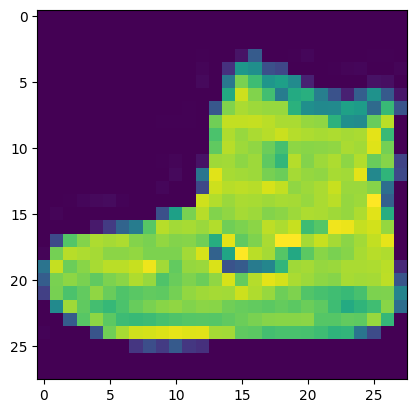

In [13]:
image, label = train_data[0]

plt.imshow(image.squeeze())

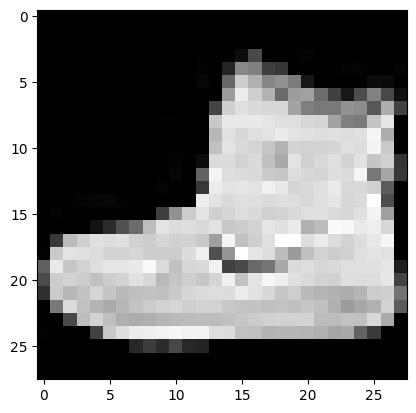

In [14]:
plt.imshow(image.squeeze(), cmap='gray')

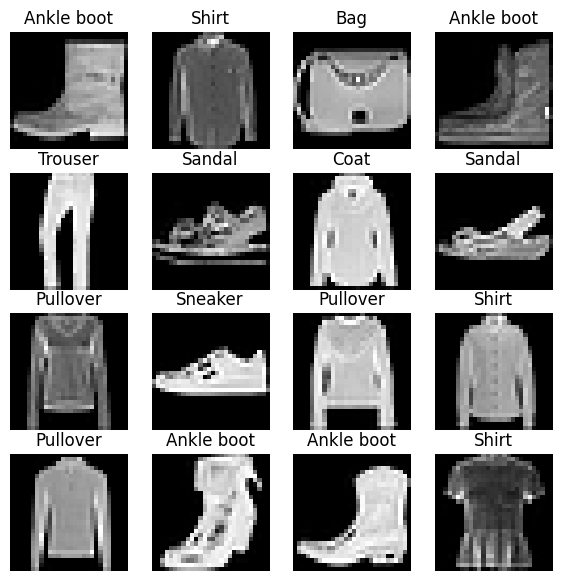

In [15]:
torch.manual_seed(42)
fig = plt.figure(figsize=(7, 7))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

### Prepare dataloader

converts dataset to python iterable.

specifically, turns data into mini-batches

gives neural network more chances to update its gradient per epoch

In [16]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9136286e60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9136286f20>)

In [18]:
print(f"Length of dataloader: {len(train_dataloader)} batches, each of size {BATCH_SIZE}")

Length of dataloader: 1875 batches, each of size 32


In [19]:
# CHeck whats inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

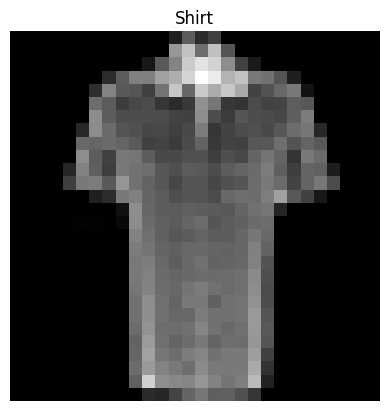

In [20]:
# Show sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

### Create a baseline model

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flatten: {x.shape}") # C, H, B
print(f"Shape after flatten: {output.shape}") # C, H*B

Shape before flatten: torch.Size([1, 28, 28])
Shape after flatten: torch.Size([1, 784])


In [22]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

model0 = FashionMNISTModelV0(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to('cpu')

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1, 1, 28, 28])
model0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [25]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [26]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
else:
  print('Downloading helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)


In [27]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)


In [28]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds.")
  return total_time


In [29]:
start_time = timer()
# some code....
end_time = timer()
print_train_time(start_time, end_time, 'cpu')

Train time on cpu: 0.000 seconds.


4.7627999947508215e-05

### Creating training loop and training model on batches of data

1. Loop through epochs
2. Loop through training batches, calculate training loss *per batch*
3. Loop through testing batches, calculate testing loss *per batch*
4. Print what's happening
5. Time it all

In [30]:
from tqdm.auto import tqdm

# Set seed and start timer
torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------------")

  ##Training
  train_loss = 0
  #Add loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model0.train()
    # 1. Forward Pass
    y_pred = model0(X)

    # 2. Calculate loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate training loss

    # 3. Optimimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    #5. Update optimizer
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataLoader to get average
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model0(X_test)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate test acccuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# Calculate training time
train_time_end_cpu = timer()
total_train_time_model0 = print_train_time(start=train_time_start_cpu,
                                           end=train_time_end_cpu,
                                           device=str(next(model0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test Loss: 0.5095, Test accuracy: 82.0387
Epoch: 1
---------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test Loss: 0.4799, Test accuracy: 83.1969
Epoch: 2
---------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test Loss: 0.4766, Test accuracy: 83.4265
Train time on cpu: 26.462 seconds.


## Make predictions and get Model0 results

In [31]:
from torch.autograd.grad_mode import inference_mode
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Retruns dictionary containing results of model predictoing on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Find average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only when model created using classes
          "model_loss": loss.item(),
          "model_accuracy": acc}

# Calculate model0 results on test dataset
model0_results = eval_model(model=model0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

## Setup device agnostic code

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Bulding Model1 with non-linearity

In [33]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [34]:
torch.manual_seed(42)
model1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

next(model1.parameters()).device

device(type='cuda', index=0)

In [35]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)

### Create functions for Training step and testing step

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate training loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1)) # go from logits to pred labels

    # 3. Optimimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    #5. Update optimizer
    optimizer.step()


  # Divide total train loss by length of train dataLoader to get average
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")


In [37]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn,
              accuracy_fn,
              device: torch.device=device):

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred = test_pred.argmax(dim=1)) # go from logits to pred labels

    # Calculate test loss nad accuracy average per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")


In [38]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
train_time_start_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n---------------------")
  train_step(model=model1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device=device)

  test_step(model=model1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_gpu = timer()
total_train_time_model1 = print_train_time(start=train_time_start_gpu,
                                        end=train_time_end_gpu,
                                        device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------------------
Train Loss: 1.09199 | Train Accuracy: 61.34%
Test Loss: 0.95636 | Test Accuracy: 65.00%

Epoch 1
---------------------
Train Loss: 0.78101 | Train Accuracy: 71.93%
Test Loss: 0.72227 | Test Accuracy: 73.91%

Epoch 2
---------------------
Train Loss: 0.67027 | Train Accuracy: 75.94%
Test Loss: 0.68500 | Test Accuracy: 75.02%

Train time on cuda: 32.001 seconds.


In [39]:
model0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

In [40]:
total_train_time_model0

26.462034294999967

In [41]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Retruns dictionary containing results of model predictoing on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Find average loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only when model created using classes
          "model_loss": loss.item(),
          "model_accuracy": acc}

In [42]:
# Get model1 results dictionary
model1_results = eval_model(model=model1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_accuracy': 75.01996805111821}

## Build a ConvNet

In [43]:
class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that  replicates TinyVGG
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,  x: torch.Tensor):
    x = self.conv_block1(x)
    #print(f"Outout shape after conv block 1: {x.shape}")
    x = self.conv_block2(x)
    #print(f"Outout shape after conv block 2: {x.shape}")
    x = self.classifier(x)
    #print(f"Outout shape after classifier: {x.shape}")
    return x


In [44]:
torch.manual_seed(42)

model2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [45]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28)).to(device)

model2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Step through `nn.Conv2d()`

In [46]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(images.shape)
print(test_image.shape)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])


In [47]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### Stepping through `nn.MaxPool2d`

In [48]:
test_image.shape

torch.Size([3, 64, 64])

In [49]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
print(test_image_through_conv.shape)

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(test_image_through_conv_and_max_pool.shape)

torch.Size([10, 62, 62])
torch.Size([10, 31, 31])


### Trainig and testing CNN using train and test step functions

In [50]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------------------")
  train_step(model=model2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)
  test_step(model=model2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model2 = timer()
total_train_time_model2 = print_train_time(start=train_time_start_model2,
                 end=train_time_end_model2,
                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------------------
Train Loss: 0.59508 | Train Accuracy: 78.39%
Test Loss: 0.39638 | Test Accuracy: 85.83%

Epoch: 1
-----------------------
Train Loss: 0.36312 | Train Accuracy: 86.87%
Test Loss: 0.34964 | Test Accuracy: 86.87%

Epoch: 2
-----------------------
Train Loss: 0.32574 | Train Accuracy: 88.27%
Test Loss: 0.32529 | Test Accuracy: 88.07%

Train time on cuda: 35.998 seconds.


In [52]:
# Get model2 results
model2_results = eval_model(model=model2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3252907693386078,
 'model_accuracy': 88.06908945686901}

### Compare model reults and training time

In [53]:
import pandas as pd

compare_results = pd.DataFrame([model0_results,
                               model1_results,
                               model2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325291,88.069089


In [54]:
compare_results['Training_time'] = [total_train_time_model0,
                                    total_train_time_model1,
                                    total_train_time_model2]
compare_results

,model_name,model_loss,model_accuracy,Training_time
0,FashionMNISTModelV0,0.476639,83.426518,26.462034
1,FashionMNISTModelV1,0.685001,75.019968,32.001112
2,FashionMNISTModelV2,0.325291,88.069089,35.997958


Text(0.5, 0, 'Accuracy (%)')

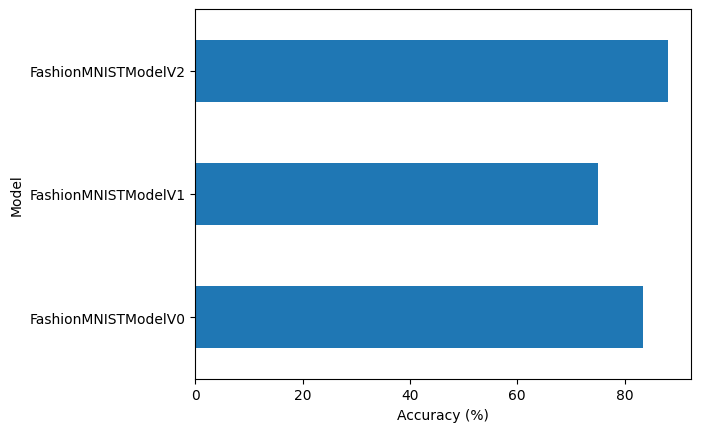

In [55]:
#Visualize model results
compare_results.set_index('model_name')['model_accuracy'].plot(kind='barh')
plt.ylabel('Model')
plt.xlabel("Accuracy (%)")

## Make and evaluate random predictions with best model

In [56]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Add batch dim and pass to device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass
      pred_logits = model(sample)

      # Get pred probs
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob to cpu for further calcs
      pred_probs.append(pred_prob.cpu())

  # Stack pred probs to turn list to tensor
  return torch.stack(pred_probs)

In [57]:
import random
random.seed(0)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

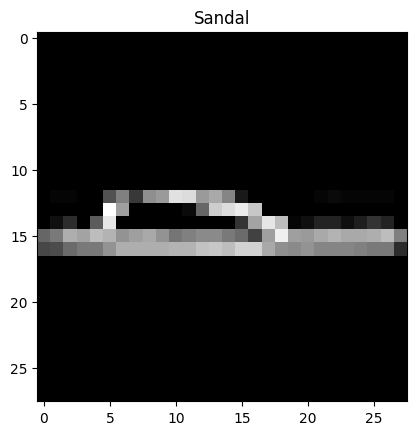

In [58]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [59]:
# Make predictions
pred_probs = make_predictions(model=model2,
                              data = test_samples,
                              device=device)

pred_probs[0]

tensor([1.5099e-04, 1.6508e-05, 1.3253e-05, 5.7000e-04, 2.7302e-06, 9.9388e-01,
        9.5123e-06, 4.9728e-03, 3.7613e-04, 1.0847e-05])

In [60]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 8, 3, 6, 7, 7, 5, 8, 1])

In [61]:
test_labels

[5, 8, 1, 6, 7, 7, 5, 8, 1]

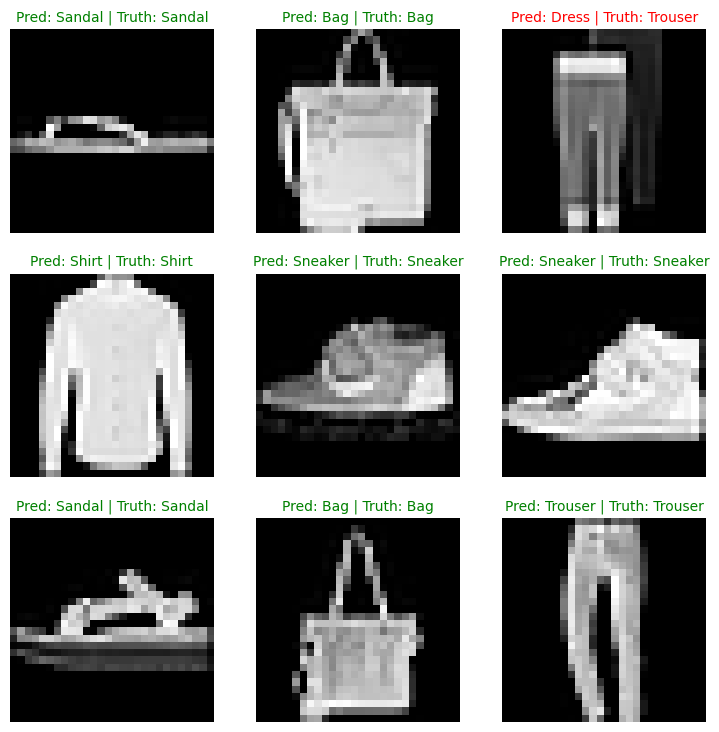

In [62]:
plt.figure(figsize=(9, 9))
nr, nc = 3, 3
for i, sample in enumerate(test_samples):
  plt.subplot(nr, nc, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label==truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

## Making a confusion matrix

1. Make predictions with our trained model on test dataset.
2. Plot confusion matrix with `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [63]:
import mlxtend

In [64]:
mlxtend.__version__

'0.22.0'

In [67]:
from tqdm.auto import tqdm

y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= 'Making predictions'):
    X, y = X.to(device), y.to(device)

    y_logits = model2(X)

    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [73]:
try:
  import torchmetrics
except:
  !pip install -q torchmetrics
  import torchmetrics

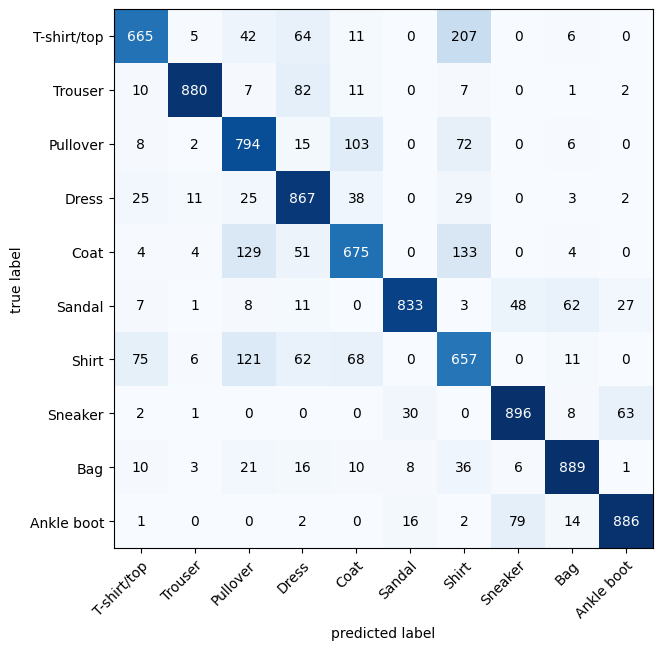

In [77]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass', num_classes = len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7)) # matplotlib likes numpy


In [76]:
confmat_tensor

tensor([[665,   5,  42,  64,  11,   0, 207,   0,   6,   0],
        [ 10, 880,   7,  82,  11,   0,   7,   0,   1,   2],
        [  8,   2, 794,  15, 103,   0,  72,   0,   6,   0],
        [ 25,  11,  25, 867,  38,   0,  29,   0,   3,   2],
        [  4,   4, 129,  51, 675,   0, 133,   0,   4,   0],
        [  7,   1,   8,  11,   0, 833,   3,  48,  62,  27],
        [ 75,   6, 121,  62,  68,   0, 657,   0,  11,   0],
        [  2,   1,   0,   0,   0,  30,   0, 896,   8,  63],
        [ 10,   3,  21,  16,  10,   8,  36,   6, 889,   1],
        [  1,   0,   0,   2,   0,  16,   2,  79,  14, 886]])

## Save and load best performing model

In [79]:
from pathlib import Path

# Create model dirctory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)


# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# Saving model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/03_pytorch_computer_vision_model2.pth


In [80]:
torch.manual_seed(42)

loaded_model2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))

loaded_model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model2.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [81]:
model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3252907693386078,
 'model_accuracy': 88.06908945686901}

In [83]:
from IPython.terminal.ipapp import load_default_config
# Evaluate loaded model
torch.manual_seed(42)

loaded_model2_results = eval_model(model=loaded_model2,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn,
                                   device=device)

loaded_model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3252907693386078,
 'model_accuracy': 88.06908945686901}

In [84]:
torch.isclose(torch.tensor(model2_results['model_loss']),
              torch.tensor(loaded_model2_results['model_loss']),
              atol=1e-5)

tensor(True)